# Analisis de acciones del mercado - Proyecto

Analizar la data de acciones de empresas de la industria automoviles,    
a partir del Enero 2012 hasta enero de 2017.
La idea del proyectos es practicar con Pandas, Matplotlib, Numpy. 
Los resultados derivados de este proyecto no estan destinados a proveer consejos financieros sobre las acciones analizadas.

## 0: Importar las librerias 
(requeridas para el proyecto en un mismo bloque)

In [1]:
import pandas_datareader as dr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

## 1:  Obtener la Data

Importar la data de TESLA usando Pandas Datareader  
Importar la data de FORD usando un archivo csv descargado de Yahoo Finance  
Importa la data de GM a traves de Pandas Datareader  
Exportar la data obtenifa por Pandas Datareader a un csv
Desplegar la data de las acciones usando Pandas - Dataframe

In [2]:
inicio = datetime.datetime(2012,1,1)
fin = datetime.datetime(2017,1,1)
tesla = dr.DataReader("TSLA",'yahoo',inicio, fin)


In [3]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002
2016-12-29,43.840000,42.824001,43.712002,42.936001,20225000,42.936001
2016-12-30,43.500000,42.335999,43.259998,42.737999,23213000,42.737999


In [4]:
tesla.to_csv('Tesla_accion.csv') # exportando a un csv

In [5]:
#ford = pd.read_csv('F.csv')
ford = dr.DataReader("F",'yahoo',inicio, fin)

In [6]:
ford.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,12.46,12.36,12.43,12.46,15621200.0,10.150093
2016-12-27,12.51,12.36,12.43,12.39,19467400.0,10.093071
2016-12-28,12.45,12.22,12.37,12.25,26875400.0,9.979024
2016-12-29,12.31,12.22,12.25,12.23,19819100.0,9.962733
2016-12-30,12.28,12.08,12.24,12.13,27405700.0,9.881270


In [7]:
gm = dr.DataReader("GM",'yahoo',inicio, fin)
gm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,35.869999,35.540001,35.830002,35.689999,9351200.0,31.217722
2016-12-27,35.930000,35.500000,35.799999,35.540001,6008700.0,31.086515
2016-12-28,35.799999,35.130001,35.740002,35.150002,8451900.0,30.745390
2016-12-29,35.480000,35.119999,35.250000,35.139999,4416700.0,30.736641
2016-12-30,35.310001,34.669998,35.209999,34.840000,7646100.0,30.474236


## 2: Visualizando la Data

** Recrear el grafico linea de todas las acciones usando el Open Price

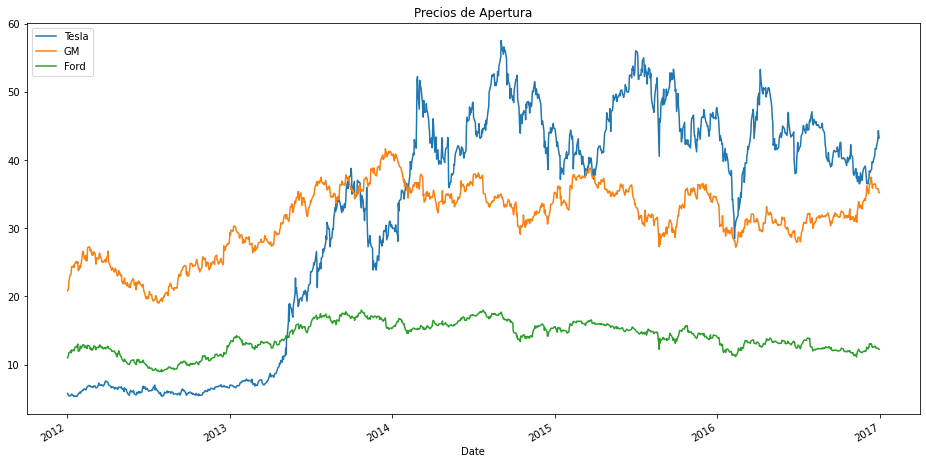

In [8]:
# Codigo Aqui
tesla.Open.plot(label='Tesla', figsize=(16,8), title='Precios de Apertura')
gm.Open.plot(label='GM')
ford.Open.plot(label='Ford')
plt.legend(loc=2)

---
**Graficar el Volumen por dia de cada accion**

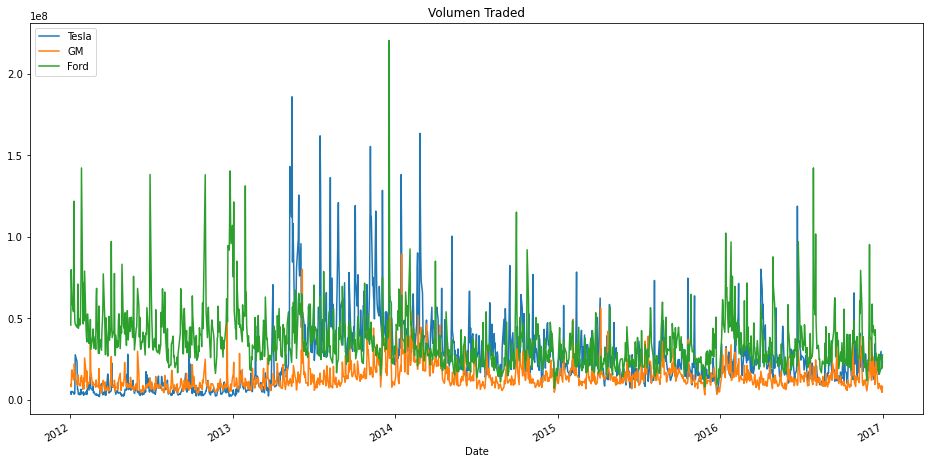

In [9]:
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title='Volumen Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend(loc=2)

¿Cúal fue la fecha con el pico mas alto de volumen transado en FORD?

In [10]:
ford['Volume'].argmax() # indice o numero de fila donde ocurre el valor maximo
ford['Volume'].idxmax() 

Timestamp('2013-12-18 00:00:00')

In [11]:
## Que ocurrio:
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf

Para poder comparar mejor cual empresa ha tenido un volumen mayor de transacciones, vamos a evaluarlo en dolares.  
Crear una nueva columna en cada DataFrame que sea el Open Price  multiplicado por el Volumen, de esta manera estara expresado en dolares en funcion del open price.

In [12]:
tesla['Volumen USD'] = tesla['Open']*tesla['Volume']
gm['Volumen USD'] = gm['Open']*gm['Volume']
ford['Volumen USD'] = ford['Open']*ford['Volume']

Grafica el volumen en USD calculado en el paso anterior

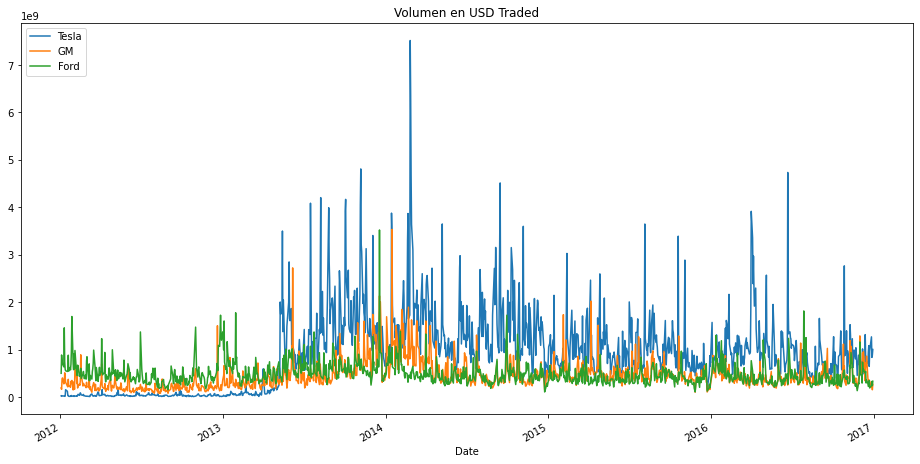

In [13]:
tesla['Volumen USD'].plot(label='Tesla', figsize=(16,8), title='Volumen en USD Traded')
gm['Volumen USD'].plot(label='GM')
ford['Volumen USD'].plot(label='Ford')
plt.legend(loc=2)

** Interesenta, se nota que ha habido un monto alto de dinero transado para Tesla al principio de 2014. ¿ Qué dia fue? 

In [14]:
tesla['Volumen USD'].idxmax() 

Timestamp('2014-02-25 00:00:00')

In [15]:
## Que ocurrio:
# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

** Graficar las MA (Medias Moviles) MA50  y MA200 para GM

<AxesSubplot:xlabel='Date'>

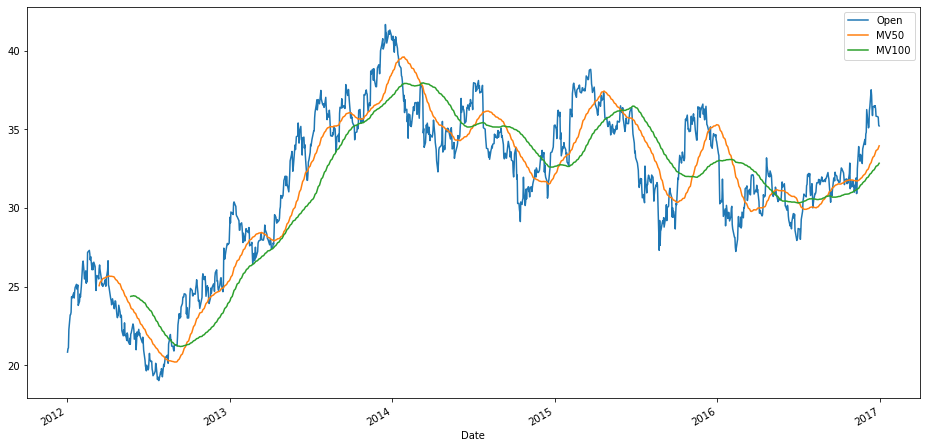

In [23]:
gm['MV50'] = gm['Open'].rolling(50).mean()
gm['MV100'] = gm['Open'].rolling(100).mean()
gm[['Open','MV50','MV100']].plot(label='GM', figsize=(16,8))

** Finalmente vamos a revisar si hay relacion entre estas acciones, tomando en cuenta que son todas de la misma industria. Esto se puede hacer con un scatter plot (grafica de dispersion).  
Importar scatter_matrix de pantas.plotting y usarlo para crear una matriz de todos los precios de apertura de las acciones.  
Va a ser necesario reacomondar las columnas del dataframe.  
https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [24]:
from pandas.plotting import scatter_matrix

In [25]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [26]:
car_comp.head()

,Open,Open,Open
Date,,,
2012-01-03,5.788,20.830000,11.00
2012-01-04,5.642,21.049999,11.15
2012-01-05,5.552,21.100000,11.33
2012-01-06,5.440,22.260000,11.74
2012-01-09,5.400,23.200001,11.83


In [27]:
car_comp.columns = ['Tesla Open','GM Open', 'Ford Open']

In [28]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,5.788,20.830000,11.00
2012-01-04,5.642,21.049999,11.15
2012-01-05,5.552,21.100000,11.33
2012-01-06,5.440,22.260000,11.74
2012-01-09,5.400,23.200001,11.83


array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

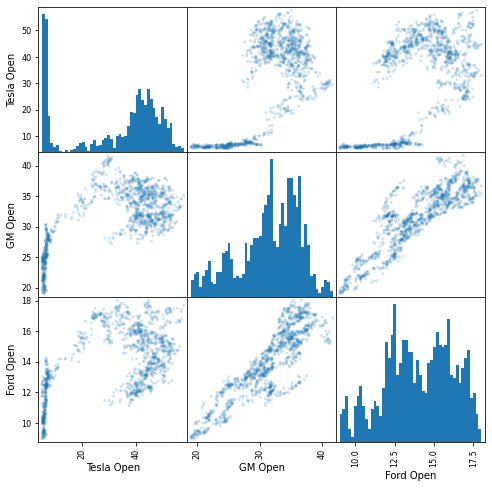

In [29]:
scatter_matrix(car_comp, figsize=(8,8), alpha =0.2, hist_kwds={'bins':50})

### Tarea Extra! 
**Crear un grafico de velas para FORD, ver el video: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Utilizar solo la data de enero de 2012**

([<matplotlib.lines.Line2D at 0x1e8706f0700>,
  <matplotlib.patches.Rectangle at 0x1e871bb56d0>])

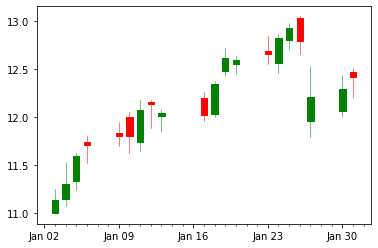

In [48]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

ford_reset = ford.loc['2012-01':'2012-01'].reset_index()
ford_reset.head()

#crear una columna con los valores numeros de la fecha (Date) para usar con mpl
ford_reset['fecha_aux'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values =[tuple(vals) for vals in ford_reset[['fecha_aux','Open','High','Low','Close']].values]
ford_values

mondays = WeekdayLocator(MONDAY) 
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d') # Jan 11
dayFormatter = DateFormatter('%d') # 12

#graficarlo
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup='g', colordown='r') 

# 3: Analisis Financiero Basico

Procentaje de Variacion Diario. 

$ r_t = \frac{p_t}{p_{t-1}} -1$

Pt es el precio en un dia x, y Pt-1 es el precio del dia anterior (x-1)
Esto indica el porcentaje de ganancia o perdia entre un dia y otro.  
Es util para evaluar volatilidad

In [54]:
tesla['retorno']= (tesla.Close/tesla.Close.shift(1))-1

In [50]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Volumen USD,retorno
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [55]:
tesla['retorno2']= tesla['Close'].pct_change(1)

In [56]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Volumen USD,retorno,retorno2
Date,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635,0.012635


In [57]:
ford['retorno']= ford['Close'].pct_change(1)
gm['retorno']= gm['Close'].pct_change(1)

In [58]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Volumen USD,retorno
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


In [59]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Volumen USD,MV50,MV100,retorno
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,NaN,NaN,-0.003490


** Graficar un hisgroma con los retornos diarios de cada compañia

<AxesSubplot:>

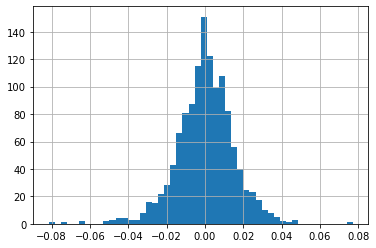

In [62]:
ford['retorno'].hist(bins=50)

<AxesSubplot:>

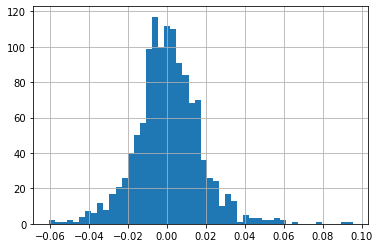

In [63]:
gm['retorno'].hist(bins=50)

<AxesSubplot:>

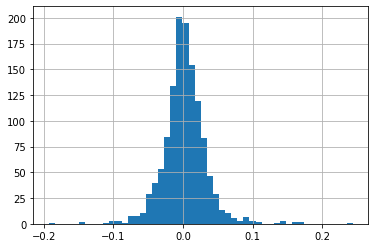

In [64]:
tesla['retorno'].hist(bins=50)

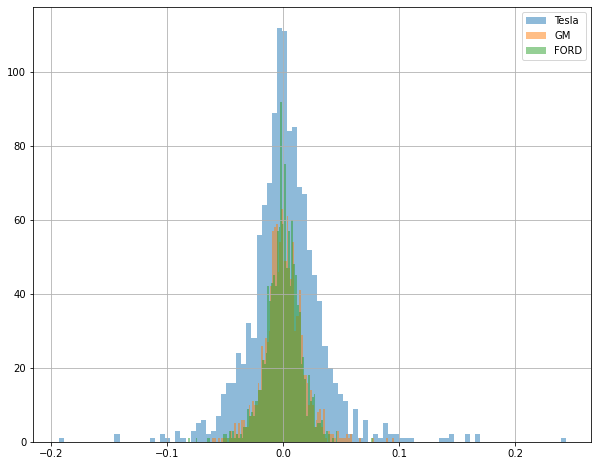

In [69]:
#todas juntas

tesla['retorno'].hist(bins=100, label='Tesla', figsize=(10,8), alpha =0.5)
gm['retorno'].hist(bins=100, label='GM', alpha =0.5)
ford['retorno'].hist(bins=100, label='FORD', alpha =0.5)
plt.legend()

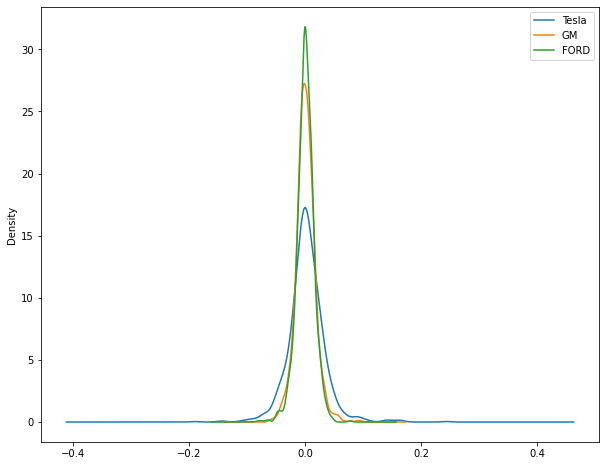

In [71]:
# Densidad de Probabilidades
tesla['retorno'].plot(kind='kde', label='Tesla', figsize=(10,8))
gm['retorno'].plot(kind='kde', label='GM')
ford['retorno'].plot(kind='kde', label='FORD')
plt.legend()

In [73]:
#Grafica de Cajas - Percentiles
box_df = pd.concat([tesla['retorno'], gm['retorno'], ford['retorno']],axis=1)
box_df

,retorno,retorno,retorno
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013177,0.004751,0.015274
2012-01-05,-0.021292,0.048227,0.025664
2012-01-06,-0.007743,0.033829,0.010354
2012-01-09,0.012635,-0.003490,0.007686
...,...,...,...
2016-12-23,0.023459,0.000000,0.004839
2016-12-27,0.029015,-0.004203,-0.005618
2016-12-28,0.000957,-0.010974,-0.011299


In [75]:
box_df.columns=['TESLA (retornos)','GM (retornos)','Ford (retornos)']
box_df.head()

,TESLA (retornos),GM (retornos),Ford (retornos)
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013177,0.004751,0.015274
2012-01-05,-0.021292,0.048227,0.025664
2012-01-06,-0.007743,0.033829,0.010354
2012-01-09,0.012635,-0.003490,0.007686


<AxesSubplot:>

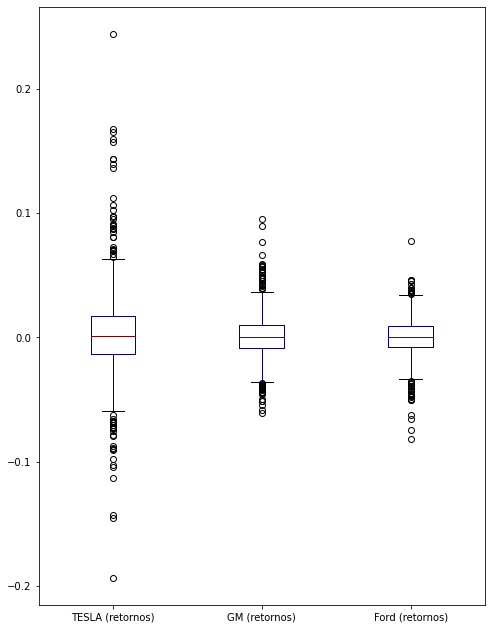

In [78]:
box_df.plot(kind='box', figsize=(8,11), colormap= 'jet')

## Comparar los retornos diarios entre Acciones

** Crear graficos de dispersion para revisar la correlacion entre las 3 empresas y determinar si hay relaciones**

array([[<AxesSubplot:xlabel='TESLA (retornos)', ylabel='TESLA (retornos)'>,
        <AxesSubplot:xlabel='GM (retornos)', ylabel='TESLA (retornos)'>,
        <AxesSubplot:xlabel='Ford (retornos)', ylabel='TESLA (retornos)'>],
       [<AxesSubplot:xlabel='TESLA (retornos)', ylabel='GM (retornos)'>,
        <AxesSubplot:xlabel='GM (retornos)', ylabel='GM (retornos)'>,
        <AxesSubplot:xlabel='Ford (retornos)', ylabel='GM (retornos)'>],
       [<AxesSubplot:xlabel='TESLA (retornos)', ylabel='Ford (retornos)'>,
        <AxesSubplot:xlabel='GM (retornos)', ylabel='Ford (retornos)'>,
        <AxesSubplot:xlabel='Ford (retornos)', ylabel='Ford (retornos)'>]],
      dtype=object)

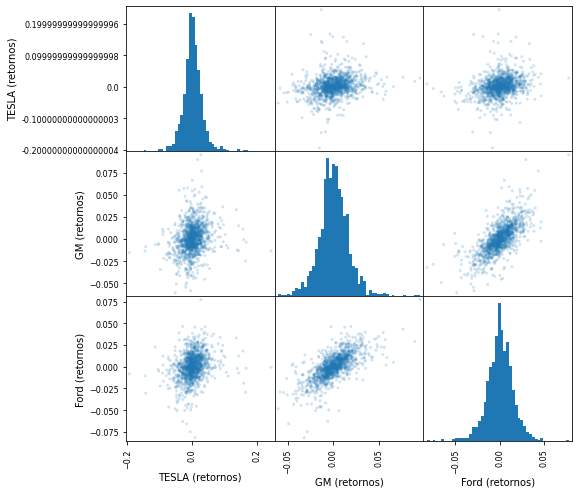

In [79]:
scatter_matrix(box_df, figsize=(8,8), hist_kwds={'bins':50}, alpha=0.2)

** Hay una relacion entre GM y FORD positiva**

<AxesSubplot:xlabel='GM (retornos)', ylabel='Ford (retornos)'>

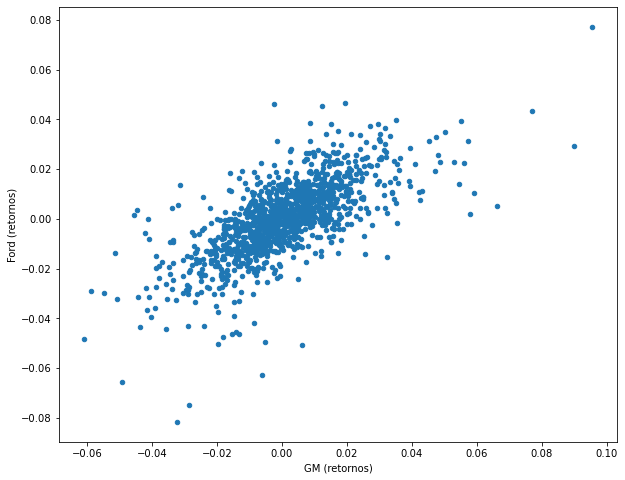

In [83]:
box_df.plot(kind='scatter', x='GM (retornos)', y ='Ford (retornos)', figsize=(10,8))

## Retornos acumulados diarios

Con los retornos acumulados diarios vamos a intentar responder, Si hubiese invertido 1$ en la compañia al principio de la serie de tiempo, cuanto seria su valor hoy dia

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

La formula del retorno acumulado es:

$ i_i = (1+r_t) * i_{t-1} $


    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [84]:
tesla['Retorno Acumulado']= (1+ tesla['retorno']).cumprod()

In [88]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close,Volumen USD,retorno,retorno2,Retorno Acumulado
Date,,,,,,,,,,
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999,9.714640e+08,0.023459,0.023459,7.597578
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998,1.271166e+09,0.029015,0.029015,7.818019
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002,8.379372e+08,0.000957,0.000957,7.825499
2016-12-29,43.840000,42.824001,43.712002,42.936001,20225000,42.936001,8.840752e+08,-0.023027,-0.023027,7.645299
2016-12-30,43.500000,42.335999,43.259998,42.737999,23213000,42.737999,1.004194e+09,-0.004612,-0.004612,7.610042


In [89]:
gm['Retorno Acumulado']= (1+ gm['retorno']).cumprod()
gm.tail()

,High,Low,Open,Close,Volume,Adj Close,Volumen USD,MV50,MV100,retorno,Retorno Acumulado
Date,,,,,,,,,,,
2016-12-23,35.869999,35.540001,35.830002,35.689999,9351200.0,31.217722,3.350535e+08,33.6438,32.6461,0.000000,1.695487
2016-12-27,35.930000,35.500000,35.799999,35.540001,6008700.0,31.086515,2.151115e+08,33.7246,32.7017,-0.004203,1.688361
2016-12-28,35.799999,35.130001,35.740002,35.150002,8451900.0,30.745390,3.020709e+08,33.8026,32.7540,-0.010974,1.669834
2016-12-29,35.480000,35.119999,35.250000,35.139999,4416700.0,30.736641,1.556887e+08,33.8710,32.7973,-0.000285,1.669359
2016-12-30,35.310001,34.669998,35.209999,34.840000,7646100.0,30.474236,2.692192e+08,33.9444,32.8403,-0.008537,1.655107


In [91]:
ford['Retorno Acumulado']= (1+ ford['retorno']).cumprod()
ford.tail()

,High,Low,Open,Close,Volume,Adj Close,Volumen USD,retorno,Retorno Acumulado
Date,,,,,,,,,
2016-12-23,12.46,12.36,12.43,12.46,15621200.0,10.150093,1.941715e+08,0.004839,1.119497
2016-12-27,12.51,12.36,12.43,12.39,19467400.0,10.093071,2.419798e+08,-0.005618,1.113208
2016-12-28,12.45,12.22,12.37,12.25,26875400.0,9.979024,3.324487e+08,-0.011299,1.100629
2016-12-29,12.31,12.22,12.25,12.23,19819100.0,9.962733,2.427840e+08,-0.001633,1.098832
2016-12-30,12.28,12.08,12.24,12.13,27405700.0,9.881270,3.354458e+08,-0.008177,1.089847


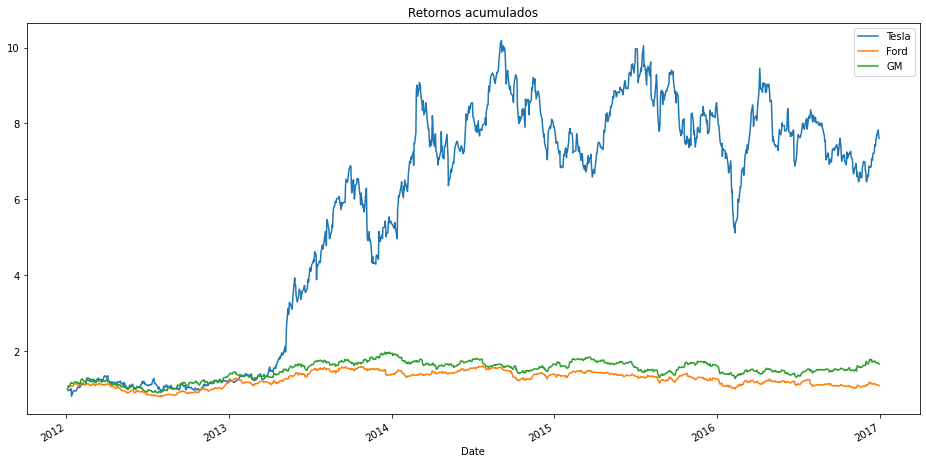

In [92]:
# a graficarlo

tesla['Retorno Acumulado'].plot(label='Tesla', figsize=(16,8), title ='Retornos acumulados')
ford['Retorno Acumulado'].plot(label='Ford')
gm['Retorno Acumulado'].plot(label='GM')
plt.legend()

# FIN! GRACIAS